In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv


In [2]:
df =  pd.read_csv("/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv", index_col = 'index')
df.shape

(26052, 6)

In [3]:
df.sample(10)

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
21738,"Kanpur, India",18-Sep-14,Silver,Grocery,M,70785
7654,"Greater Mumbai, India",22-Aug-14,Gold,Fuel,F,76143
5933,"Bengaluru, India",18-Mar-14,Signature,Food,M,248403
3798,"Ahmedabad, India",3-Sep-14,Gold,Grocery,F,213280
4622,"Greater Mumbai, India",2-Dec-13,Gold,Entertainment,F,49327
23648,"Pune, India",22-May-15,Signature,Fuel,M,249698
11935,"Delhi, India",10-Aug-14,Gold,Fuel,M,167447
22732,"Kanpur, India",6-Apr-14,Platinum,Grocery,F,135926
17209,"Vinukonda, India",28-Apr-14,Signature,Fuel,F,76773


In [4]:
#null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


**Preliminary Data Wrangling**

 1. Date column is to be converted to datetime64 format
 2. create new column 'month'and year for further hirerchial analysis and dropping the date column
 3. Checking for any duplicates and null values
 4. Removing India from the City column since the dataset contains only Indian cities

In [5]:
#converting into datetime
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_33/3558978605.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [6]:
#creating month column
df['Month'] = df['Date'].dt.month_name()

In [7]:
#creaiting another column
df['Year'] = df['Date'].dt.year

In [8]:
#dropping date column
df.drop(columns = ['Date'], inplace = True)

In [9]:
df.sample(10)

,City,Card Type,Exp Type,Gender,Amount,Month,Year
index,,,,,,,
13528,"Greater Mumbai, India",Silver,Bills,M,130203,September,2014
14440,"Kaithal, India",Gold,Bills,F,10418,March,2015
18326,"Sultanganj, India",Signature,Bills,M,166979,June,2014
19690,"Bhongir, India",Platinum,Bills,F,106909,February,2015
10766,"Bengaluru, India",Platinum,Fuel,M,193734,July,2014
10799,"Bengaluru, India",Signature,Grocery,F,52949,February,2014
8877,"Ahmedabad, India",Gold,Fuel,M,157730,November,2013
11446,"Delhi, India",Platinum,Grocery,F,14761,September,2014
14240,"Upleta, India",Gold,Entertainment,M,222874,April,2014


In [10]:
#check for duplicate:
df.duplicated().sum()

0

In [11]:
#checking for null values
for col in df.columns:
    print(f"Null values in {col} is {df[col].isna().sum()}")

Null values in City is 0
Null values in Card Type is 0
Null values in Exp Type is 0
Null values in Gender is 0
Null values in Amount is 0
Null values in Month is 0
Null values in Year is 0


In [12]:
#string formatting
def remove(values):
    return values.split(',')[0]
df['City'] = df['City'].apply(remove)

In [13]:
df.sample(5)

,City,Card Type,Exp Type,Gender,Amount,Month,Year
index,,,,,,,
10824,Bengaluru,Gold,Food,F,128446,March,2014
18135,Mandapeta,Signature,Entertainment,M,201594,April,2014
3293,Bengaluru,Signature,Grocery,M,255450,October,2014
15593,Pehowa,Gold,Fuel,F,124512,November,2014
16025,Yanam,Platinum,Bills,F,293182,October,2014


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Card Type  26052 non-null  object
 2   Exp Type   26052 non-null  object
 3   Gender     26052 non-null  object
 4   Amount     26052 non-null  int64 
 5   Month      26052 non-null  object
 6   Year       26052 non-null  int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 1.5+ MB


### Analysis - 
    1.What is the nature of spending pattern across genders
    2.Which card is used the most and what is the average spend?
    3.what is the most common expense done through card
    4.Year on year what has the trend on spending 
    5.Geography wise spending pattern

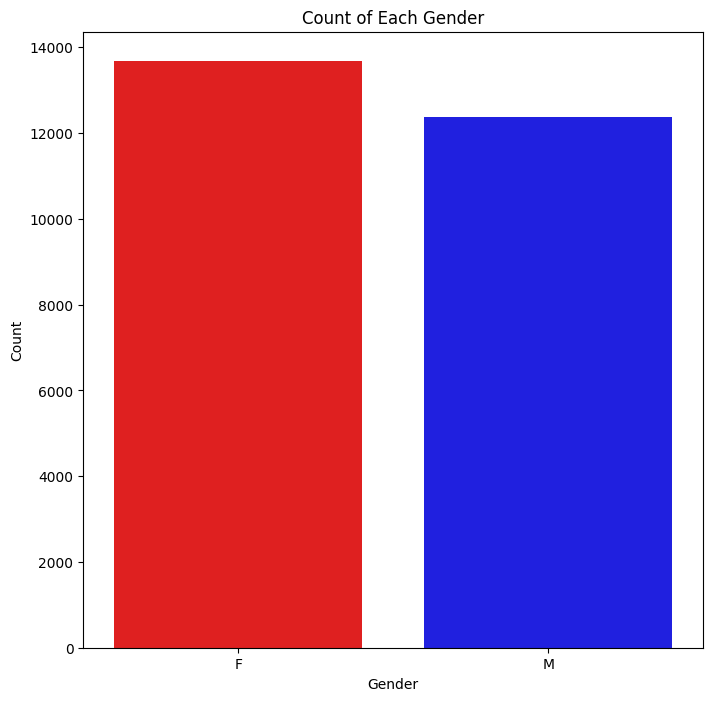

In [15]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Gender', data=df, palette={'M': 'blue', 'F': 'Red'})
plt.title("Count of Each Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

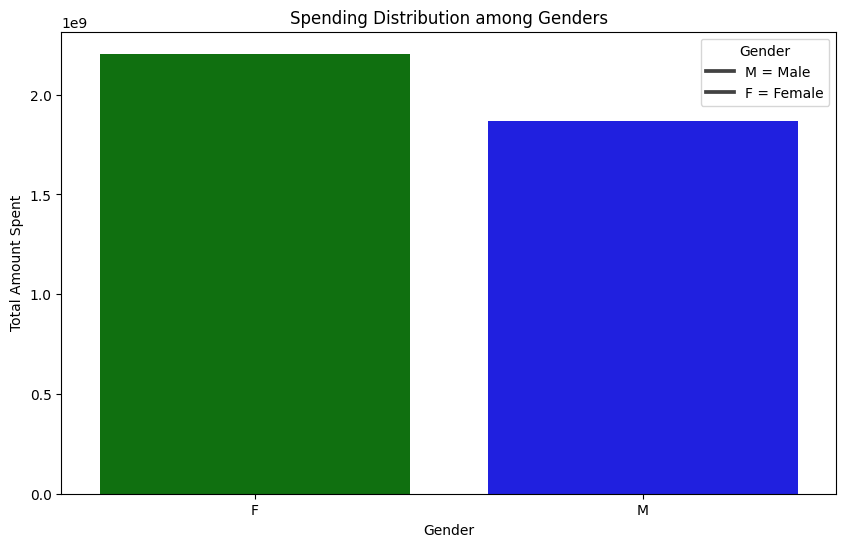

In [16]:
#Q1. Spending pattern
gender_sum = df.groupby('Gender')['Amount'].sum().reset_index()
color_map = {'M': 'blue', 'F': 'green'}

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Gender', y='Amount', data=gender_sum, palette=color_map)

plt.title("Spending Distribution among Genders")
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')

labels = ['M = Male', 'F = Female']
plt.legend(labels, title='Gender')


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Silver'),
  Text(1, 0, 'Signature'),
  Text(2, 0, 'Platinum'),
  Text(3, 0, 'Gold')])

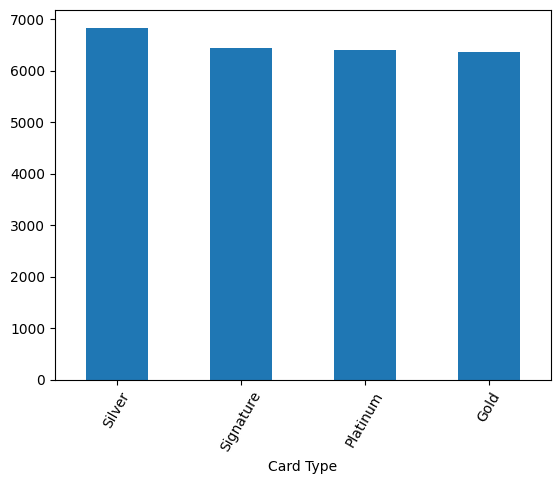

In [17]:
#Q2.Card type frequency
card_type = df['Card Type'].value_counts()
card_type.plot(kind = 'bar')
plt.xticks(rotation=60)

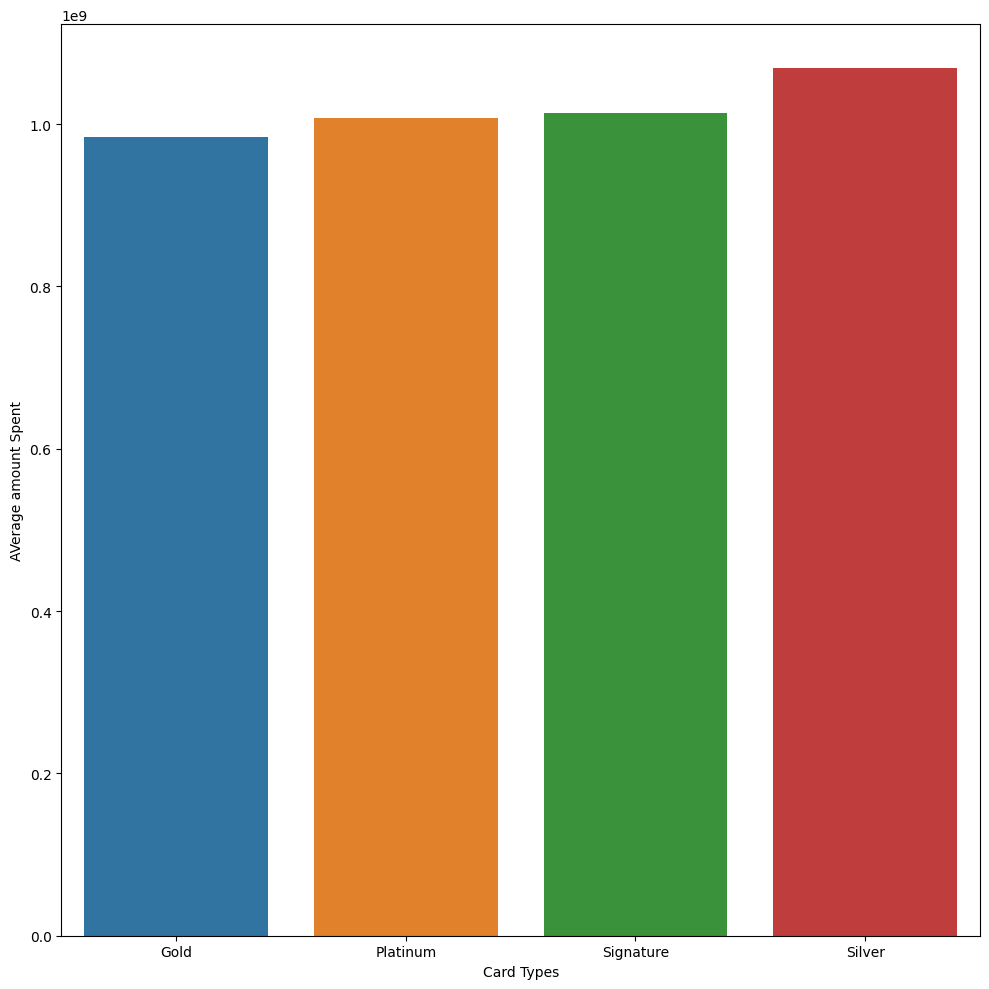

In [18]:
##spending pattern on various types of cards
plt.figure(figsize=(10,10))
expense = df.groupby('Card Type')['Amount'].sum().reset_index()

sns.barplot(x='Card Type', y='Amount', data=expense)

plt.xlabel('Card Types')
plt.ylabel('AVerage amount Spent')

plt.tight_layout()
plt.show()

In [19]:
df['Exp Type'].value_counts()

Exp Type
Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: count, dtype: int64

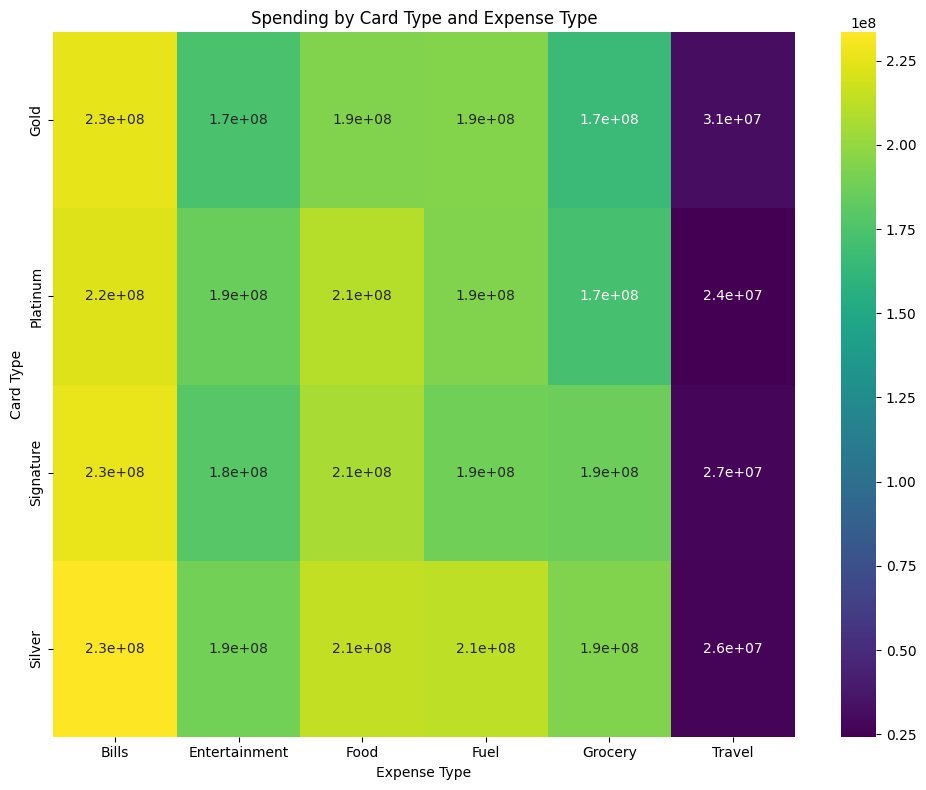

In [20]:
#cardwise expenses
pivot_table = df.pivot_table(
    index='Card Type',          
    columns='Exp Type',         
    values='Amount',            
    aggfunc='sum',             
    fill_value=0                
)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Spending by Card Type and Expense Type')
plt.xlabel('Expense Type')
plt.ylabel('Card Type')
plt.tight_layout()
plt.show()

In [21]:
##